In [9]:
a = '19se09it001'

In [1]:
# Importing all modules or library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
input_file = 'data_multivar_nb.txt' # Giving the file path to read our data

# Load data from input file
data = np.loadtxt(input_file, delimiter=',')

# Here the speration of the data is done {X, y}
X, y = data[:, :-1], data[:, -1]

In [3]:
# Have already import the GaussianNB in importing part
# From navie bayes, which is from sklearn
# Create Navies Bayes Classifier
classifier = GaussianNB()

# Train the Classifier
classifier.fit(X,y)

GaussianNB()

In [4]:
# Predict the values for training data
y_pred = classifier.predict(X)

# Compute accuracy
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

Accuracy of Naive Bayes classifier = 99.75 %


In [5]:
# Defining the Visualizer 
def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    plt.title(f'{a}')
    plt.show()

c:\Users\vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


NameError: name 'a' is not defined

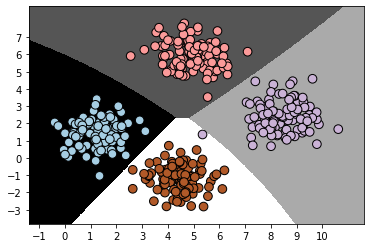

In [6]:
# Visualize the performance of the classifier
visualize_classifier(classifier, X, y)

In [7]:
# Cross validation 

# Split data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#Creating a classifier
classifier_new = GaussianNB()

#Train the classifier
classifier_new.fit(X_train, y_train)

# Predict the test data
y_test_pred = classifier_new.predict(X_test)

Accuracy of the new classifier = 100.0 %


c:\Users\vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


NameError: name 'a' is not defined

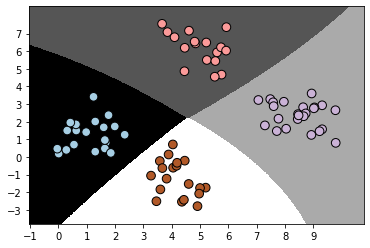

In [8]:
# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier_new, X_test, y_test)

print('Predicted output :-', y_test_pred)

#### Now the classifier is prefectly classifing our data

In [ ]:
# Scoring functions

num_folds = 3

accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")

f1_values = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

In [ ]:
# Q1 solution:
import pandas as pd
df = pd.read_csv('../input/navie-bayes-example-data/data_multivar_nb.txt', header = None)

In [ ]:
# Removing one class from the data 
df = df[df[2] != 3]

# now putting all the values together 
x_1 = df[0]
x_2 = df[1]
X = list(zip(x_1, x_2))
X = np.array(X)
y = df[2].to_numpy()

In [ ]:
# Cross validation 

# Split data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#Creating a classifier
classifier_new_1 = GaussianNB()

#Train the classifier
classifier_new_1.fit(X_train, y_train)
# Predict the test data
y_test_pred = classifier_new_1.predict(X_test)

In [ ]:
# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier_new_1, X_test, y_test)

print('Predicted output :-', y_test_pred)

In [ ]:
# Cross validation 

# Split data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

#Creating a classifier
classifier_new_2 = GaussianNB()

#Train the classifier
classifier_new_2.fit(X_train, y_train)
# Predict the test data
y_test_pred = classifier_new_1.predict(X_test)

In [ ]:
# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier_new_1, X_test, y_test)

print('Predicted output :-', y_test_pred)